In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

from functions.plot_images import plot_images
from functions.train_and_eval_model import train_and_eval_model

2024-02-22 17:20:41.045557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Randomly split the training data into a training and validation set using train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Describe the shape of the training, validation, and test sets
for dataset, images in zip(['Training', 'Validation', 'Test'], [train_images, val_images, test_images]):
    print(f'{dataset} images shape: {images.shape}')

Training images shape: (48000, 28, 28)
Validation images shape: (12000, 28, 28)
Test images shape: (10000, 28, 28)


Training set 5 first images:


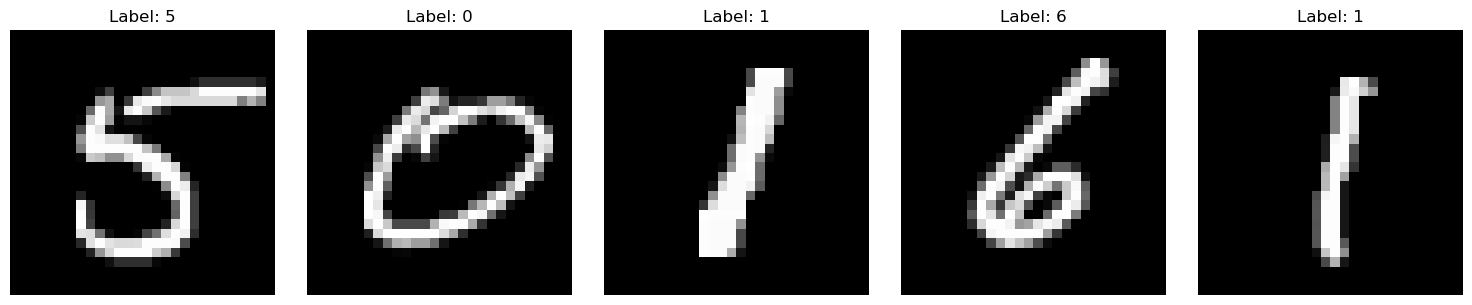

Validation set 5 first images:


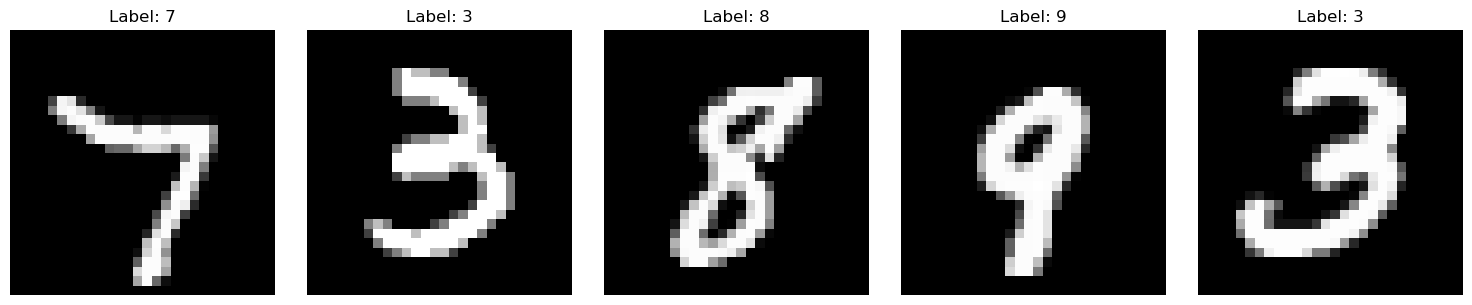

Test set 5 first images:


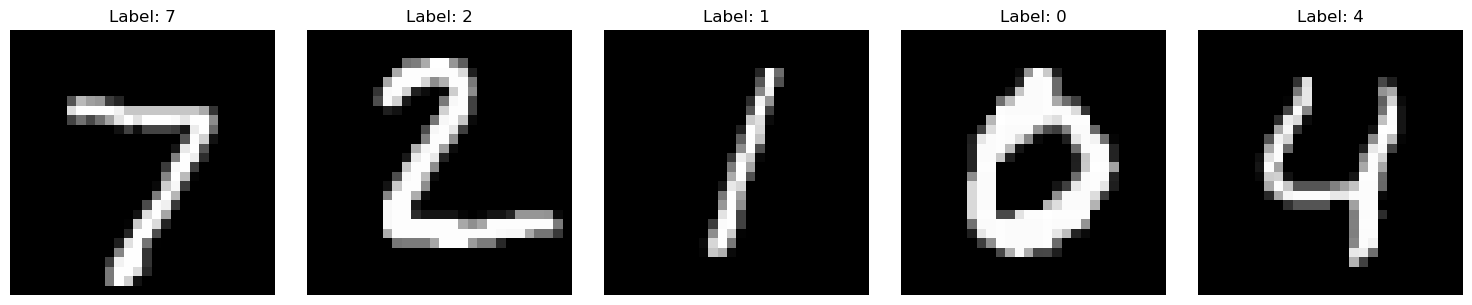

In [3]:
# Plot the first 5 labels from each of the training, validation, and test sets
print('Training set 5 first images:')
plot_images(train_images[:5], train_labels[:5])
print('Validation set 5 first images:')
plot_images(val_images[:5], val_labels[:5])
print('Test set 5 first images:')
plot_images(test_images[:5], test_labels[:5])


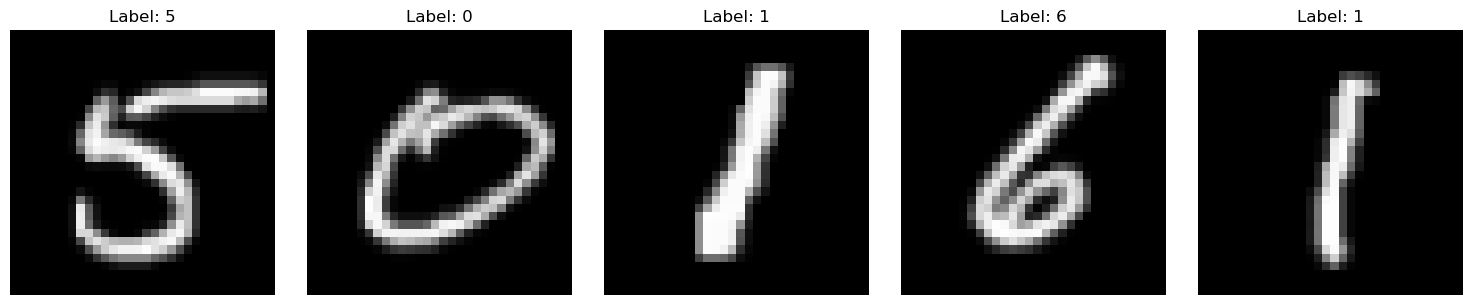

In [4]:
# Color images
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) for img in train_images])
X_val = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) for img in val_images])
X_test = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) for img in test_images])

# # Reshape the images
# X_train = train_images.reshape(28, 28, 1)
# X_val = val_images.reshape(28, 28, 1)
# X_test = test_images.reshape(28, 28, 1)

# Resize the images from 28x28 to 32x32
X_train = np.array([cv2.resize(img, (32,32)) for img in X_train])
X_val = np.array([cv2.resize(img, (32,32)) for img in X_val])
X_test = np.array([cv2.resize(img, (32,32)) for img in X_test])

plot_images(X_train[:5], train_labels[:5])

In [5]:
NUM_CLASSES = 10

# Convert the labels to one-hot encoding
y_train = to_categorical(train_labels, NUM_CLASSES)
y_val = to_categorical(val_labels, NUM_CLASSES)
y_test = to_categorical(test_labels, NUM_CLASSES)

In [6]:
# Train and evaluate the model
train_and_eval_model(X_train, y_train, X_val, y_val, X_test, y_test)

2024-02-22 17:20:45.307819: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


/home/kevin/miniconda3/envs/ComputerVision/lib/python3.11/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-02-22 17:20:46.273780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  21/1500 [..............................] - ETA: 4:34 - loss: 0.8303 - accuracy: 0.0938